<a href="https://colab.research.google.com/github/fernandodeeke/epidemias/blob/main/SEIRS_fase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

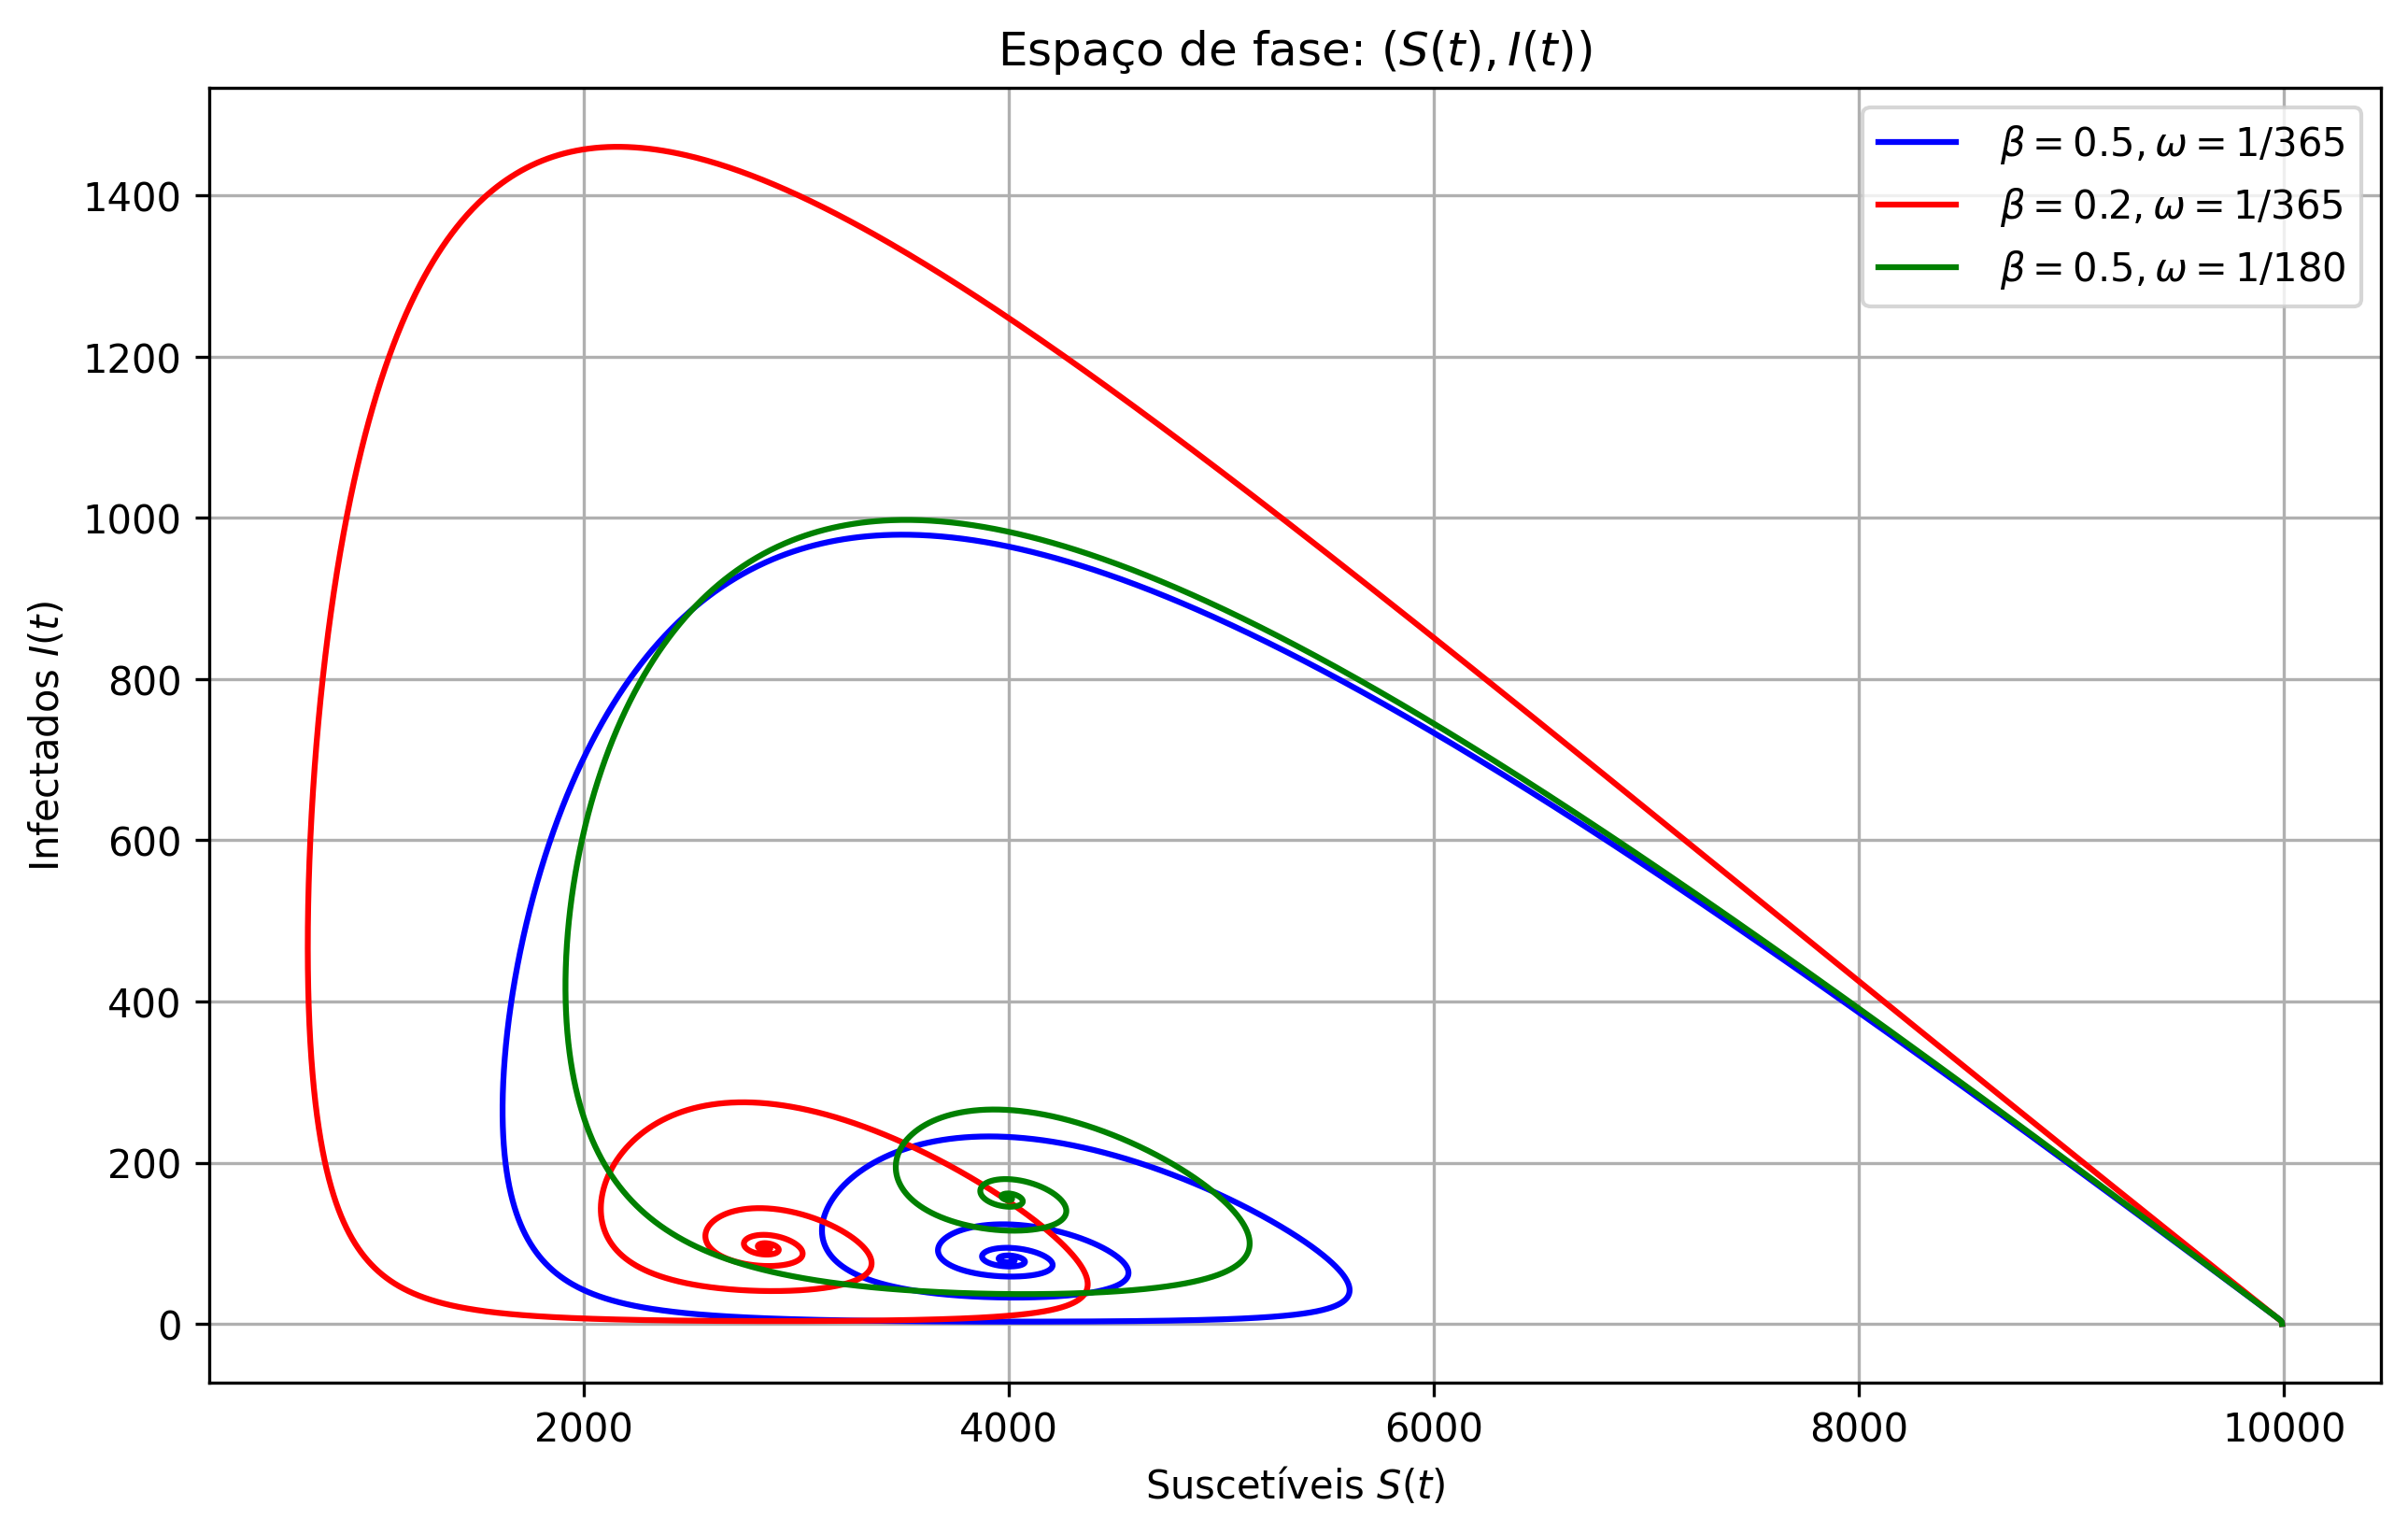

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Função que simula o modelo SEIRS
def simula_seirs(beta, sigma, gamma, omega, N, dt, T):
    passos = int(T / dt) + 1  # Inclui o ponto inicial
    S = np.zeros(passos)
    E = np.zeros(passos)
    I = np.zeros(passos)
    R = np.zeros(passos)
    tempo = np.linspace(0, T, passos)  # Vetor de tempo

    # Condições iniciais
    E[0] = 10.0  # Número inicial de expostos
    I[0] = 0.0   # Número inicial de infectados
    S[0] = N - E[0] - I[0]  # Número inicial de suscetíveis
    R[0] = 0.0   # Número inicial de recuperados

    # Loop para simulação do modelo SEIRS
    for t in range(passos - 1):
        S[t+1] = S[t] + (-beta * S[t] * I[t] / N + omega * R[t]) * dt
        E[t+1] = E[t] + (beta * S[t] * I[t] / N - sigma * E[t]) * dt
        I[t+1] = I[t] + (sigma * E[t] - gamma * I[t]) * dt
        R[t+1] = R[t] + (gamma * I[t] - omega * R[t]) * dt

    return np.array(S), np.array(I), tempo  # Retorna S, I e o vetor de tempo

# Parâmetros fixos
N = 10000  # População total
dt = 0.05  # Passo de tempo
Ts = 1825  # Comprimento da simulação (dias)

# Conjuntos de parâmetros
params_set1 = {'beta': 0.5, 'sigma': 1/7, 'gamma': 1/5, 'omega': 1/365}
params_set2 = {'beta': 0.7, 'sigma': 1/7, 'gamma': 1/5, 'omega': 1/365}
params_set3 = {'beta': 0.5, 'sigma': 1/7, 'gamma': 1/5, 'omega': 1/180}

# Simulação para cada conjunto de parâmetros
S1, I1, tempo = simula_seirs(**params_set1, N=N, dt=dt, T=Ts)
S2, I2, _ = simula_seirs(**params_set2, N=N, dt=dt, T=Ts)
S3, I3, _ = simula_seirs(**params_set3, N=N, dt=dt, T=Ts)

# Plotando o retrato de fase I x S
plt.figure(figsize=(10, 6), dpi=300)
# Gráfico do espaço de fase
plt.plot(S1, I1, label=r" $\beta=0.5, \omega=1/365$",
         color='blue')
plt.plot(S2, I2, label=r" $\beta=0.2, \omega=1/365$",
         color='red')
plt.plot(S3, I3, label=r" $\beta=0.5, \omega=1/180$",
         color='green')

# Labels e legendas
plt.title("Espaço de fase: $(S(t), I(t))$")
plt.xlabel("Suscetíveis $S(t)$")
plt.ylabel("Infectados $I(t)$")
plt.legend()
plt.grid()
plt.show()

In [8]:
equilibrium_S1 = S1[-1]
equilibrium_I1 = I1[-1]

equilibrium_S2 = S2[-1]
equilibrium_I2 = I2[-1]

equilibrium_S3 = S3[-1]
equilibrium_I3 = I3[-1]

print(f"1: S = {equilibrium_S1:.2f}, I = {equilibrium_I1:.2f}")
print(f"2: S = {equilibrium_S2:.2f}, I = {equilibrium_I2:.2f}")
print(f"3: S = {equilibrium_S3:.2f}, I = {equilibrium_I3:.2f}")

1: S = 4015.70, I = 80.97
2: S = 2855.98, I = 94.36
3: S = 3999.90, I = 156.27
